# Profit Maximization under Perfect Competition

In the first part of the simulation the (falling) market demand function P(Q) and the cost function of all firms are defined (all firms have the same cost structure). Interestingly, switching from increasing to decreasing marginal costs (be it linear or quadratic) does not change the qualitative outcome of the simulation.

The demand elasticity is defined by adjusting demand_slope (high (positive) value means a high demand elasticity, i.e. a big reaction of aggregated demand to price changes).

In the current situation, there are 10 firms competing in the market.

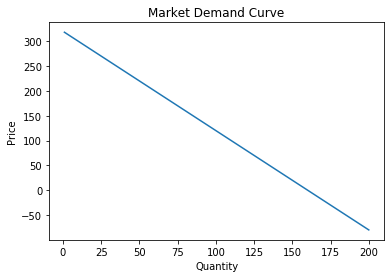

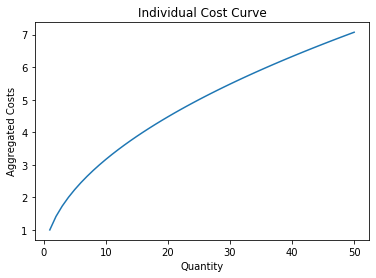

In [146]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Parameter
demand_max = 320
demand_slope = 2

n = 10 # Number of firms
def demand(Q):
    return demand_max - demand_slope * Q # Aggregated demand function (Q = aggregated quantity)
def costs(q):
    return q**0.5 # Individual cost function for each firm (q = individual quantity)
def market_outcome(outputs): 
    Q_test = sum(outputs)
    P_test = demand(Q_test)
    cos_test = costs(outputs)
    rev_test = P * q
    profit_test = rev_test - cos_test

Q_range = np.array(list(range(1,201)))
q_range = np.array(list(range(1,51)))
D_range = demand(Q_range)
c_range = costs(q_range)

plt.plot(Q_range, D_range)
plt.title('Market Demand Curve')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

plt.plot(q_range, c_range)
plt.title('Individual Cost Curve')
plt.xlabel('Quantity')
plt.ylabel('Aggregated Costs')
plt.show()

At the beginning, the output of each firm is chosen randomly between 1 and 5. The sum of all indiviual outputs gives the aggregated market supply with whom we can calculate the market price (by inserting the value into the demand function). 

Using the individual production of each firm, their revenue, costs and profit is calculated. The profits are reinvested and enable the firm to adjust their production by a higher quantity. For further analysis, the program also tracks the exact development of quantity, profits and investments of three singe firms (in order of adjustment the first, middle and last one).

The two graphs shows, how production and profits are distributed among the firms in the beginning (since the price is the same for alle firms, these distributions have to be the same by desing - if not, there is a mistake in the program).

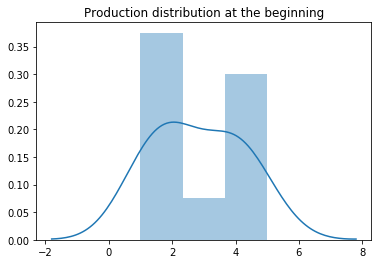

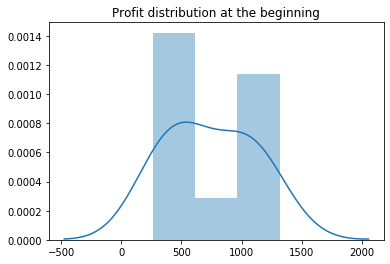

In [147]:
q_list = []
for _ in range(10):
    q_list.append(random.randint(1,5))
q = np.array(q_list)

q_beginning = q
invest = np.array([0] * n)

Q = sum(q) # Aggregated Output
P = demand(Q) # Market Price
prices = [P]

# Individual firms:
cos = costs(q) # Costs
rev = P * q # Revenue
profit = rev - cos

sns.distplot(q_beginning)
plt.title('Production distribution at the beginning')
plt.show()

sns.distplot(profit)
plt.title('Profit distribution at the beginning')
plt.show()

dev_firm1_q = [q[0]]
dev_firm1_profit = [profit[0]]
dev_firm1_invest = [0]
dev_firm1_cos = [cos[0]]
dev_firm1_rev = [rev[0]]

dev_firm5_q = [q[4]]
dev_firm5_profit = [profit[4]]
dev_firm5_invest = [4]
dev_firm5_cos = [cos[4]]
dev_firm5_rev = [rev[4]]

dev_firm10_q = [q[9]]
dev_firm10_profit = [profit[9]]
dev_firm10_invest = [9]
dev_firm10_cos = [cos[9]]
dev_firm10_rev = [rev[9]]


profit_beginning = profit
q_aggregated = [sum(q)]

Now the firms get to alter their production value. Starting with Firm 1, all firms test whether an increase or decrease of production has a positive effect on their profits (since a reduction of the (aggregated) supply leads to a higher market price, which could be benefitial) and set their new output accordingly. The user can determine the number of rounds the firms get to make production decisions (1 round means 1 adjustment per firm = 10 decisions in total).

In [148]:
for counter in range(1,31):
    for i in range(0,10):
        q_test = q
        q_test[i] = q_test[i] + 2 + (invest[i]/3000)
        Q_test = sum(q_test)
        P_test = demand(Q_test)
        cos_test = costs(q_test)
        rev_test = P_test * q_test
        profit_test = rev_test - cos_test
        if profit_test[i] > profit[i]:
            Q = Q_test
            P = P_test
            cos = cos_test
            rev = rev_test
            profit = profit_test
            invest_help = np.array([0] * n)
            invest_help[i] += profit[i]
            invest = invest + invest_help
            q = q_test
        else:
            q_test = q
            q_test[i] = q_test[i] - 2 - (invest[i]/3000)
            Q_test = sum(q_test)
            P_test = demand(Q_test)
            cos_test = costs(q_test)
            rev_test = P_test * q_test
            profit_test = rev_test - cos_test
            if profit_test[i] > profit[i]:
                Q = Q_test
                P = P_test
                cos = cos_test
                rev = rev_test
                profit = profit_test
                invest_help = np.array([0] * n)
                invest_help[i] += profit[i]
                invest = invest + invest_help
                q = q_test
        invest[invest < 0] = 0
        cos[cos < 0] = 0
        dev_firm1_q.append(q[0])
        dev_firm1_profit.append(profit[0])
        dev_firm1_invest.append(invest[0])
        dev_firm1_cos.append(cos[0])
        dev_firm1_rev.append(rev[0])
        dev_firm5_q.append(q[4])
        dev_firm5_profit.append(profit[4])
        dev_firm5_invest.append(invest[4])
        dev_firm5_cos.append(cos[4])
        dev_firm5_rev.append(rev[4])
        dev_firm10_q.append(q[9])
        dev_firm10_profit.append(profit[9])
        dev_firm10_invest.append(invest[9])
        dev_firm10_cos.append(cos[9])
        dev_firm10_rev.append(rev[9])
        q_aggregated.append(sum(q))
        prices.append(P)
        
    counter += 1
    turn.append(counter)

profit_end = profit

After all rounds have been simulated and all decisions have been made, the program shows the results:

1. The distribution of the firms' profits changes. It is possible, that all firms are better/worse off than in the beginning or that the picture is mixed. It is important to remember that profits are not aggregated here but instead used as investments. Hence, the distribution in the end is only a snapshot of the situation after the last round and can change after just one production adjustment by one of the firms.

2. As economic theory predicts, the competition among firms leads to falling prices which is good for consumers. By being isolated and egoistic, the firms tend to steadily increase the aggregated output until further increases would bring higher costs than profits because of the fallen prices. Therefore, their combined performance regarding profits is worse than it would have been, if they had acted as one monopoly without competing against each other.

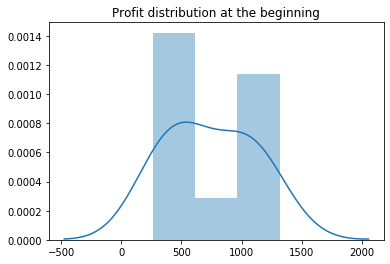

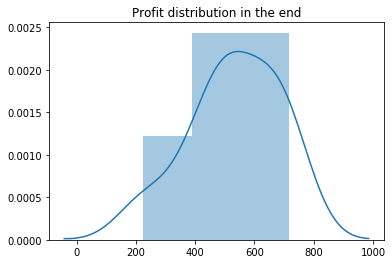

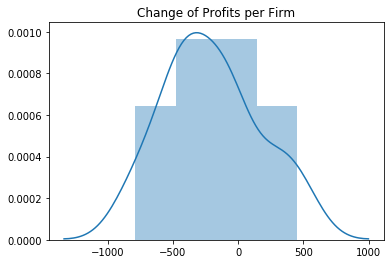

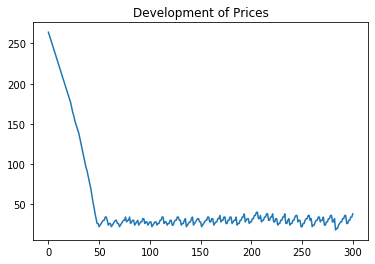

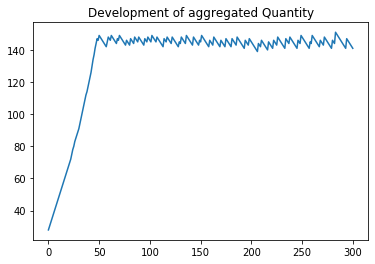

In [149]:
sns.distplot(profit_beginning)
plt.title('Profit distribution at the beginning')
plt.show()

sns.distplot(profit_end)
plt.title('Profit distribution in the end')
plt.show()

profit_dev = profit_end - profit_beginning

sns.distplot(profit_dev)
plt.title('Change of Profits per Firm')
plt.show()

plt.plot(prices)
plt.title('Development of Prices')
plt.show()

plt.plot(q_aggregated)
plt.title('Development of aggregated Output')
plt.show()

Analyzing the behavior and the success of firms in finding the ideal, i.e. profit maximizing, production volume, it is evident that the first firm to set a new quantity has an advantage over the following. Additionally, a higher quantity at the beginning is also an advantage that can compensate for a late decision-making.

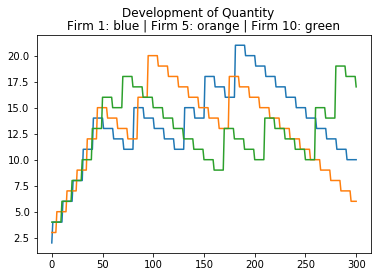

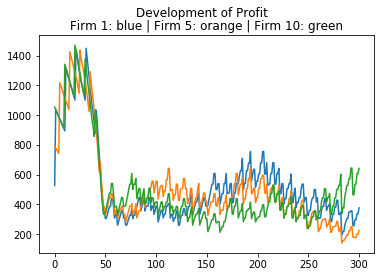

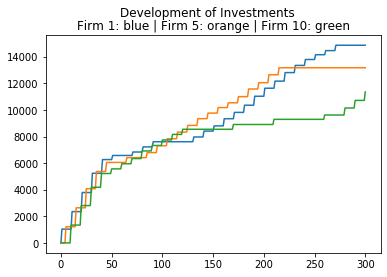

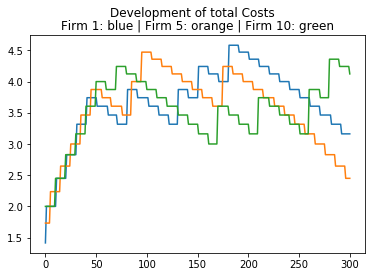

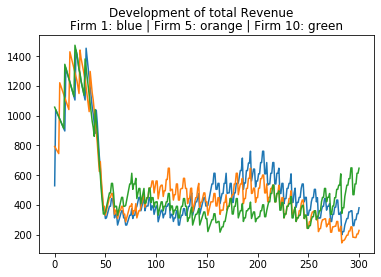

In [150]:
plt.plot(dev_firm1_q)
plt.plot(dev_firm5_q)
plt.plot(dev_firm10_q)
plt.suptitle('Development of Outputs')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_profit)
plt.plot(dev_firm5_profit)
plt.plot(dev_firm10_profit)
plt.suptitle('Development of Profits')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_invest)
plt.plot(dev_firm5_invest)
plt.plot(dev_firm10_invest)
plt.suptitle('Development of Investments')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_cos)
plt.plot(dev_firm5_cos)
plt.plot(dev_firm10_cos)
plt.suptitle('Development of total Costs')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_rev)
plt.plot(dev_firm5_rev)
plt.plot(dev_firm10_rev)
plt.suptitle('Development of total Revenue')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

Needless to say, there are still a lot of things to integrate in this simulation. On of the most important things would definitely be the possibility of bankruptcies and a more realistic investment behavior: It would make sense if firms would accumulate profit and decide than which part of it should be invested (condition: investment < additional profits) and which saved. A negative accumulated profit two rounds in a row could lead to the failure of the firm and its exclusion from the simulation. 